In [1]:
import pandas as pd
from darts import TimeSeries

In [2]:
df = pd.read_csv("MY1_2023.csv")

df

,Datetime,id,field1,field2,field3,field4,field5,field6,field7,field8
0,10-01-2023 20:00,503372.0,23.385867,38.066724,442.508711,0.000000,30.0,67.285714,14.428571,15.571429
1,10-01-2023 20:15,503383.0,23.250297,35.728543,503.089431,0.000000,30.0,68.133333,16.933333,18.933333
2,10-01-2023 20:30,503398.0,27.758007,36.726547,950.243902,0.000000,30.0,68.400000,17.666667,19.066667
3,10-01-2023 20:45,503413.0,26.571767,35.528942,1119.024390,4.166667,30.0,68.933333,19.200000,20.400000
4,10-01-2023 21:00,503428.0,24.673784,35.928144,950.569106,0.694444,30.0,69.200000,18.133333,19.133333
...,...,...,...,...,...,...,...,...,...,...
14689,12-06-2023 20:15,684018.0,7.829181,12.375250,105.040650,38.888889,31.0,58.000000,8.200000,9.266667
14690,12-06-2023 20:30,684033.0,7.591934,10.778443,107.967480,38.194444,31.0,58.533333,8.400000,9.066667
14691,12-06-2023 20:45,684048.0,5.931198,9.580838,111.869919,37.268519,31.0,58.600000,8.266667,9.000000
14692,12-06-2023 21:00,684063.0,7.117438,11.177645,112.520325,39.814815,31.0,59.000000,8.733333,9.400000


In [3]:
df1 = df
df1['Datetime'] = pd.to_datetime(df['Datetime'])

df1 = df.set_index('Datetime')
#df1
df2=df1.resample('1H').mean()
df2.reset_index(inplace = True)
df2.head()

,Datetime,id,field1,field2,field3,field4,field5,field6,field7,field8
0,2023-01-02 00:00:00,533870.5,15.895611,21.906188,241.382114,0.0,29.266667,64.566667,6.200000,7.033333
1,2023-01-02 01:00:00,533930.5,21.767497,24.700599,382.845528,0.0,29.000000,68.350000,26.100000,33.833333
2,2023-01-02 02:00:00,533990.5,14.234875,21.457086,179.756098,0.0,28.333333,67.816667,14.000000,17.200000
3,2023-01-02 03:00:00,534050.5,16.666667,21.956088,266.097561,0.0,28.816667,68.583333,12.933333,14.550000
4,2023-01-02 04:00:00,534110.5,9.905101,19.461078,87.642276,0.0,28.550000,67.583333,7.116667,8.083333


In [4]:
df2.isnull().sum()

Datetime       0
id          4460
field1      4460
field2      4460
field3      4460
field4      4460
field5      4460
field6      4460
field7      4460
field8      4460
dtype: int64

In [5]:
df2.fillna(method = 'bfill', inplace=True)
df2

,Datetime,id,field1,field2,field3,field4,field5,field6,field7,field8
0,2023-01-02 00:00:00,533870.5,15.895611,21.906188,241.382114,0.000000,29.266667,64.566667,6.200000,7.033333
1,2023-01-02 01:00:00,533930.5,21.767497,24.700599,382.845528,0.000000,29.000000,68.350000,26.100000,33.833333
2,2023-01-02 02:00:00,533990.5,14.234875,21.457086,179.756098,0.000000,28.333333,67.816667,14.000000,17.200000
3,2023-01-02 03:00:00,534050.5,16.666667,21.956088,266.097561,0.000000,28.816667,68.583333,12.933333,14.550000
4,2023-01-02 04:00:00,534110.5,9.905101,19.461078,87.642276,0.000000,28.550000,67.583333,7.116667,8.083333
...,...,...,...,...,...,...,...,...,...,...
8129,2023-12-06 17:00:00,683845.5,7.295374,12.175649,73.170732,8.796296,28.266667,46.700000,10.900000,11.500000
8130,2023-12-06 18:00:00,683905.5,12.277580,15.019960,99.430894,26.388889,29.966667,53.433333,11.150000,11.600000
8131,2023-12-06 19:00:00,683965.5,10.438909,11.976048,108.130081,34.780093,30.400000,56.816667,9.133333,9.533333
8132,2023-12-06 20:00:00,684025.5,7.473310,11.327345,108.211382,37.500000,31.000000,58.266667,8.433333,9.150000


In [6]:
print(df2.isnull().sum())

Datetime    0
id          0
field1      0
field2      0
field3      0
field4      0
field5      0
field6      0
field7      0
field8      0
dtype: int64


In [7]:
df = df2

target1 = 'field1'
test_l = 168
train_l = len(df) - test_l
date = 'Datetime'
# Create a TimeSeries, specifying the time and value columns
series1 = TimeSeries.from_dataframe(df, date, target1)

# Set aside the last 24 hours as a validation series
train1, val1 = series1[:train_l], series1[train_l:]

target2 = 'field2'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series2 = TimeSeries.from_dataframe(df, date, target2)

# Set aside the last 24 hours as a validation series
train2, val2 = series2[:train_l], series2[train_l:]

target3 = 'field3'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series3 = TimeSeries.from_dataframe(df, date, target3)

# Set aside the last 24 hours as a validation series
train3, val3 = series3[:train_l], series3[train_l:]

target4 = 'field4'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series4 = TimeSeries.from_dataframe(df, date, target4)

# Set aside the last 24 hours as a validation series
train4, val4 = series4[:train_l], series4[train_l:]

target7 = 'field7'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series7 = TimeSeries.from_dataframe(df, date, target7)

# Set aside the last 24 hours as a validation series
train7, val7 = series7[:train_l], series7[train_l:]

target8 = 'field8'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series8 = TimeSeries.from_dataframe(df, date, target8)

# Set aside the last 24 hours as a validation series
train8, val8 = series8[:train_l], series8[train_l:]

# CatBoost Model

In [9]:
from darts.metrics import rmse, mae , mape
from darts.models import CatBoostModel

# Train the CatBoost model for target1
model1 = CatBoostModel(lags=96, learning_rate=0.1)
model1.fit(train1, verbose=True)

# Test the CatBoost model for target1
prediction1 = model1.predict(len(val1))

# Calculate RMSE and MAE for target1
rmse1 = rmse(prediction1, val1)
mae1 = mae(prediction1, val1)
mape1 = mape(prediction1, val1)

# Train the CatBoost model for target2
model2 = CatBoostModel(lags=96, learning_rate=0.1)
model2.fit(train2, verbose=True)

# Test the CatBoost model for target2
prediction2 = model2.predict(len(val2))

# Calculate RMSE and MAE for target2
rmse2 = rmse(prediction2, val2)
mae2 = mae(prediction2, val2)
mape2 = mape(prediction2, val2)

# Train the CatBoost model for target3
model3 = CatBoostModel(lags=96, learning_rate=0.1)
model3.fit(train3, verbose=True)

# Test the CatBoost model for target3
prediction3 = model3.predict(len(val3))

# Calculate RMSE and MAE for target3
rmse3 = rmse(prediction3, val3)
mae3 = mae(prediction3, val3)
mape3 = mape(prediction3, val3)

# Train the CatBoost model for target4
model4 = CatBoostModel(lags=96, learning_rate=0.1)
model4.fit(train4, verbose=True)

# Test the CatBoost model for target4
prediction4 = model4.predict(len(val4))

# Calculate RMSE and MAE for target4
rmse4 = rmse(prediction4, val4)
mae4 = mae(prediction4, val4)
mape4 = mape(prediction4, val4)

# Train the CatBoost model for target7
model7 = CatBoostModel(lags=96, learning_rate=0.1)
model7.fit(train7, verbose=True)

# Test the CatBoost model for target7
prediction7 = model7.predict(len(val7))

# Calculate RMSE and MAE for target7
rmse7 = rmse(prediction7, val7)
mae7 = mae(prediction7, val7)
mape7 = mape(prediction7, val7)

# Train the CatBoost model for target8
model8 = CatBoostModel(lags=96, learning_rate=0.1)
model8.fit(train8, verbose=True)

# Test the CatBoost model for target8
prediction8 = model8.predict(len(val8))

# Calculate RMSE and MAE for target8
rmse8 = rmse(prediction8, val8)
mae8 = mae(prediction8, val8)
mape8 = mape(prediction8, val8)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Target': ['target1', 'target2', 'target3', 'target4', 'target7', 'target8'],
    'RMSE': [rmse1, rmse2, rmse3, rmse4, rmse7, rmse8],
    'MAE': [mae1, mae2, mae3, mae4, mae7, mae8],
    'MAPE': [mape1, mape2, mape3, mape4, mape7, mape8]
})

# Save the results to a CSV file
results.to_csv('CatBoostModel_2.csv', index=False)


0:	learn: 6.3130094	total: 149ms	remaining: 2m 29s
1:	learn: 5.9001677	total: 161ms	remaining: 1m 20s
2:	learn: 5.5543856	total: 172ms	remaining: 57.2s
3:	learn: 5.2443566	total: 183ms	remaining: 45.6s
4:	learn: 4.9747702	total: 194ms	remaining: 38.5s
5:	learn: 4.7458337	total: 204ms	remaining: 33.8s
6:	learn: 4.5335492	total: 215ms	remaining: 30.5s
7:	learn: 4.3640325	total: 226ms	remaining: 28s
8:	learn: 4.2083725	total: 236ms	remaining: 26s
9:	learn: 4.0861337	total: 247ms	remaining: 24.4s
10:	learn: 3.9795856	total: 258ms	remaining: 23.2s
11:	learn: 3.8771595	total: 268ms	remaining: 22.1s
12:	learn: 3.7824044	total: 280ms	remaining: 21.2s
13:	learn: 3.7072747	total: 291ms	remaining: 20.5s
14:	learn: 3.6399215	total: 300ms	remaining: 19.7s
15:	learn: 3.5800265	total: 311ms	remaining: 19.1s
16:	learn: 3.5255046	total: 322ms	remaining: 18.6s
17:	learn: 3.4765597	total: 333ms	remaining: 18.2s
18:	learn: 3.4329188	total: 345ms	remaining: 17.8s
19:	learn: 3.3952563	total: 356ms	remaining

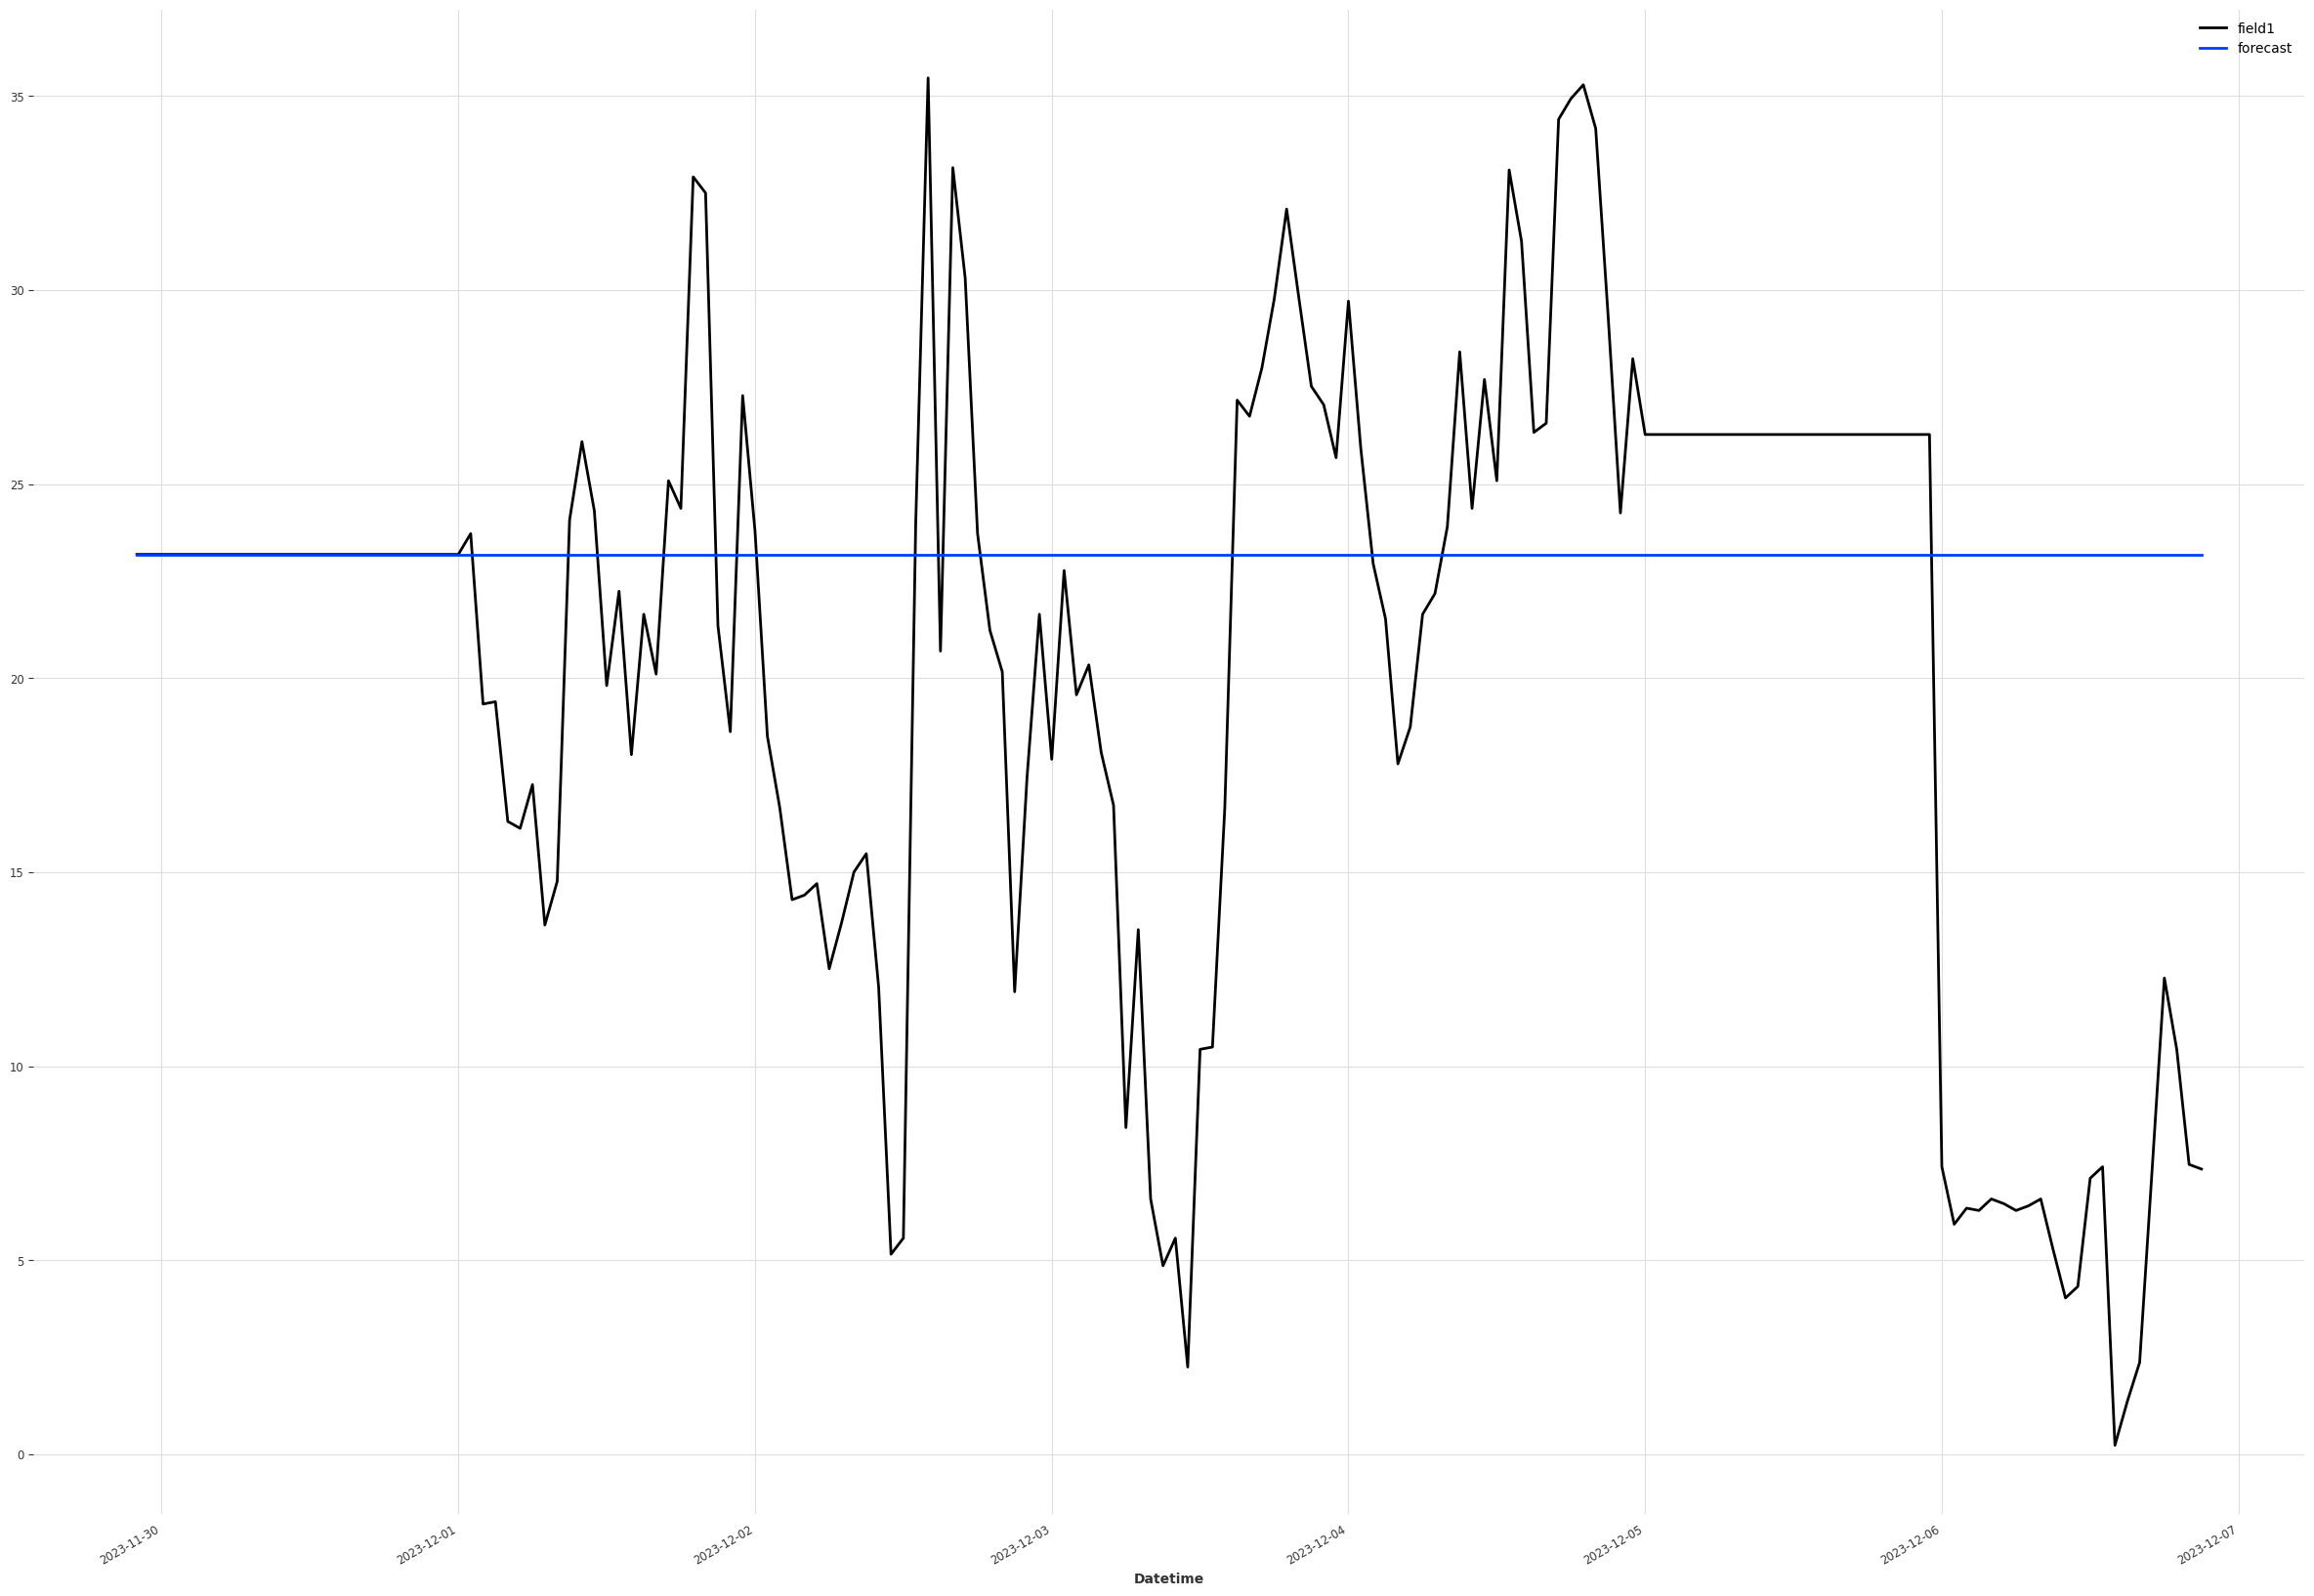

In [10]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# mean_absolute_error(val1,predcbm1)

plt.rcParams['figure.figsize'] = [30, 20]
val1.plot()
prediction1.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

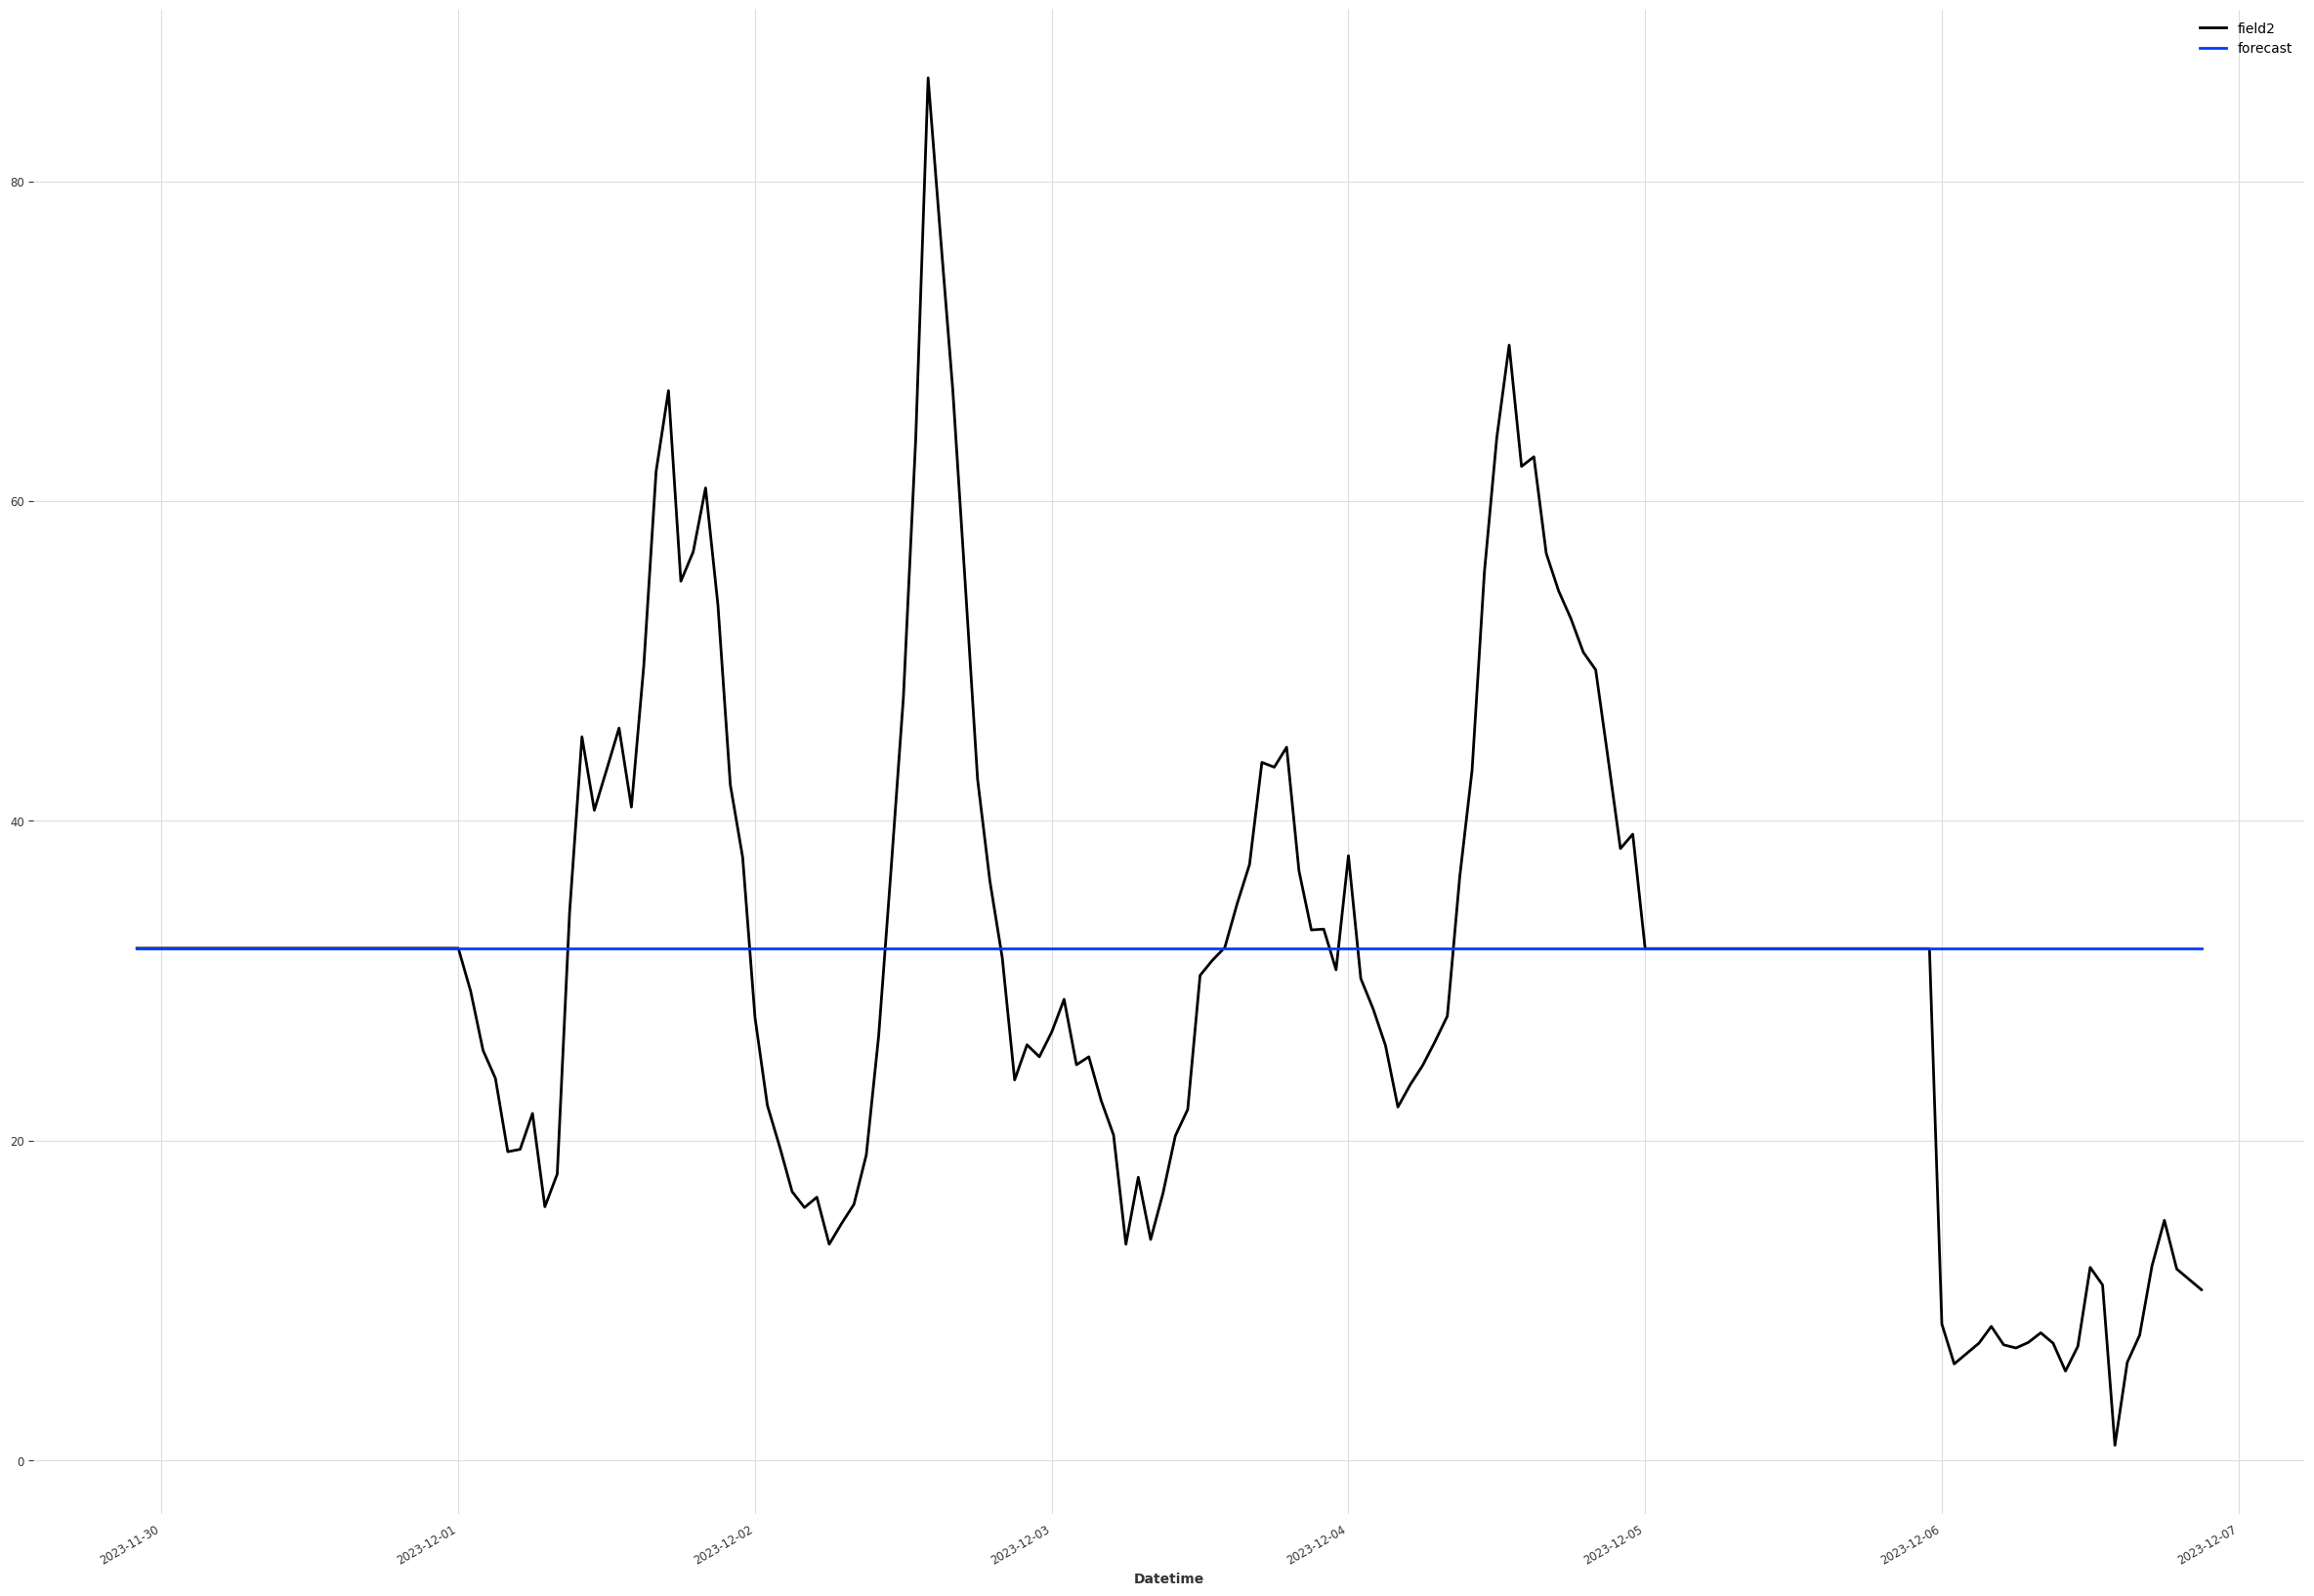

In [11]:
# mean_absolute_error(val1,predcbm1)

plt.rcParams['figure.figsize'] = [30, 20]
val2.plot()
prediction2.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

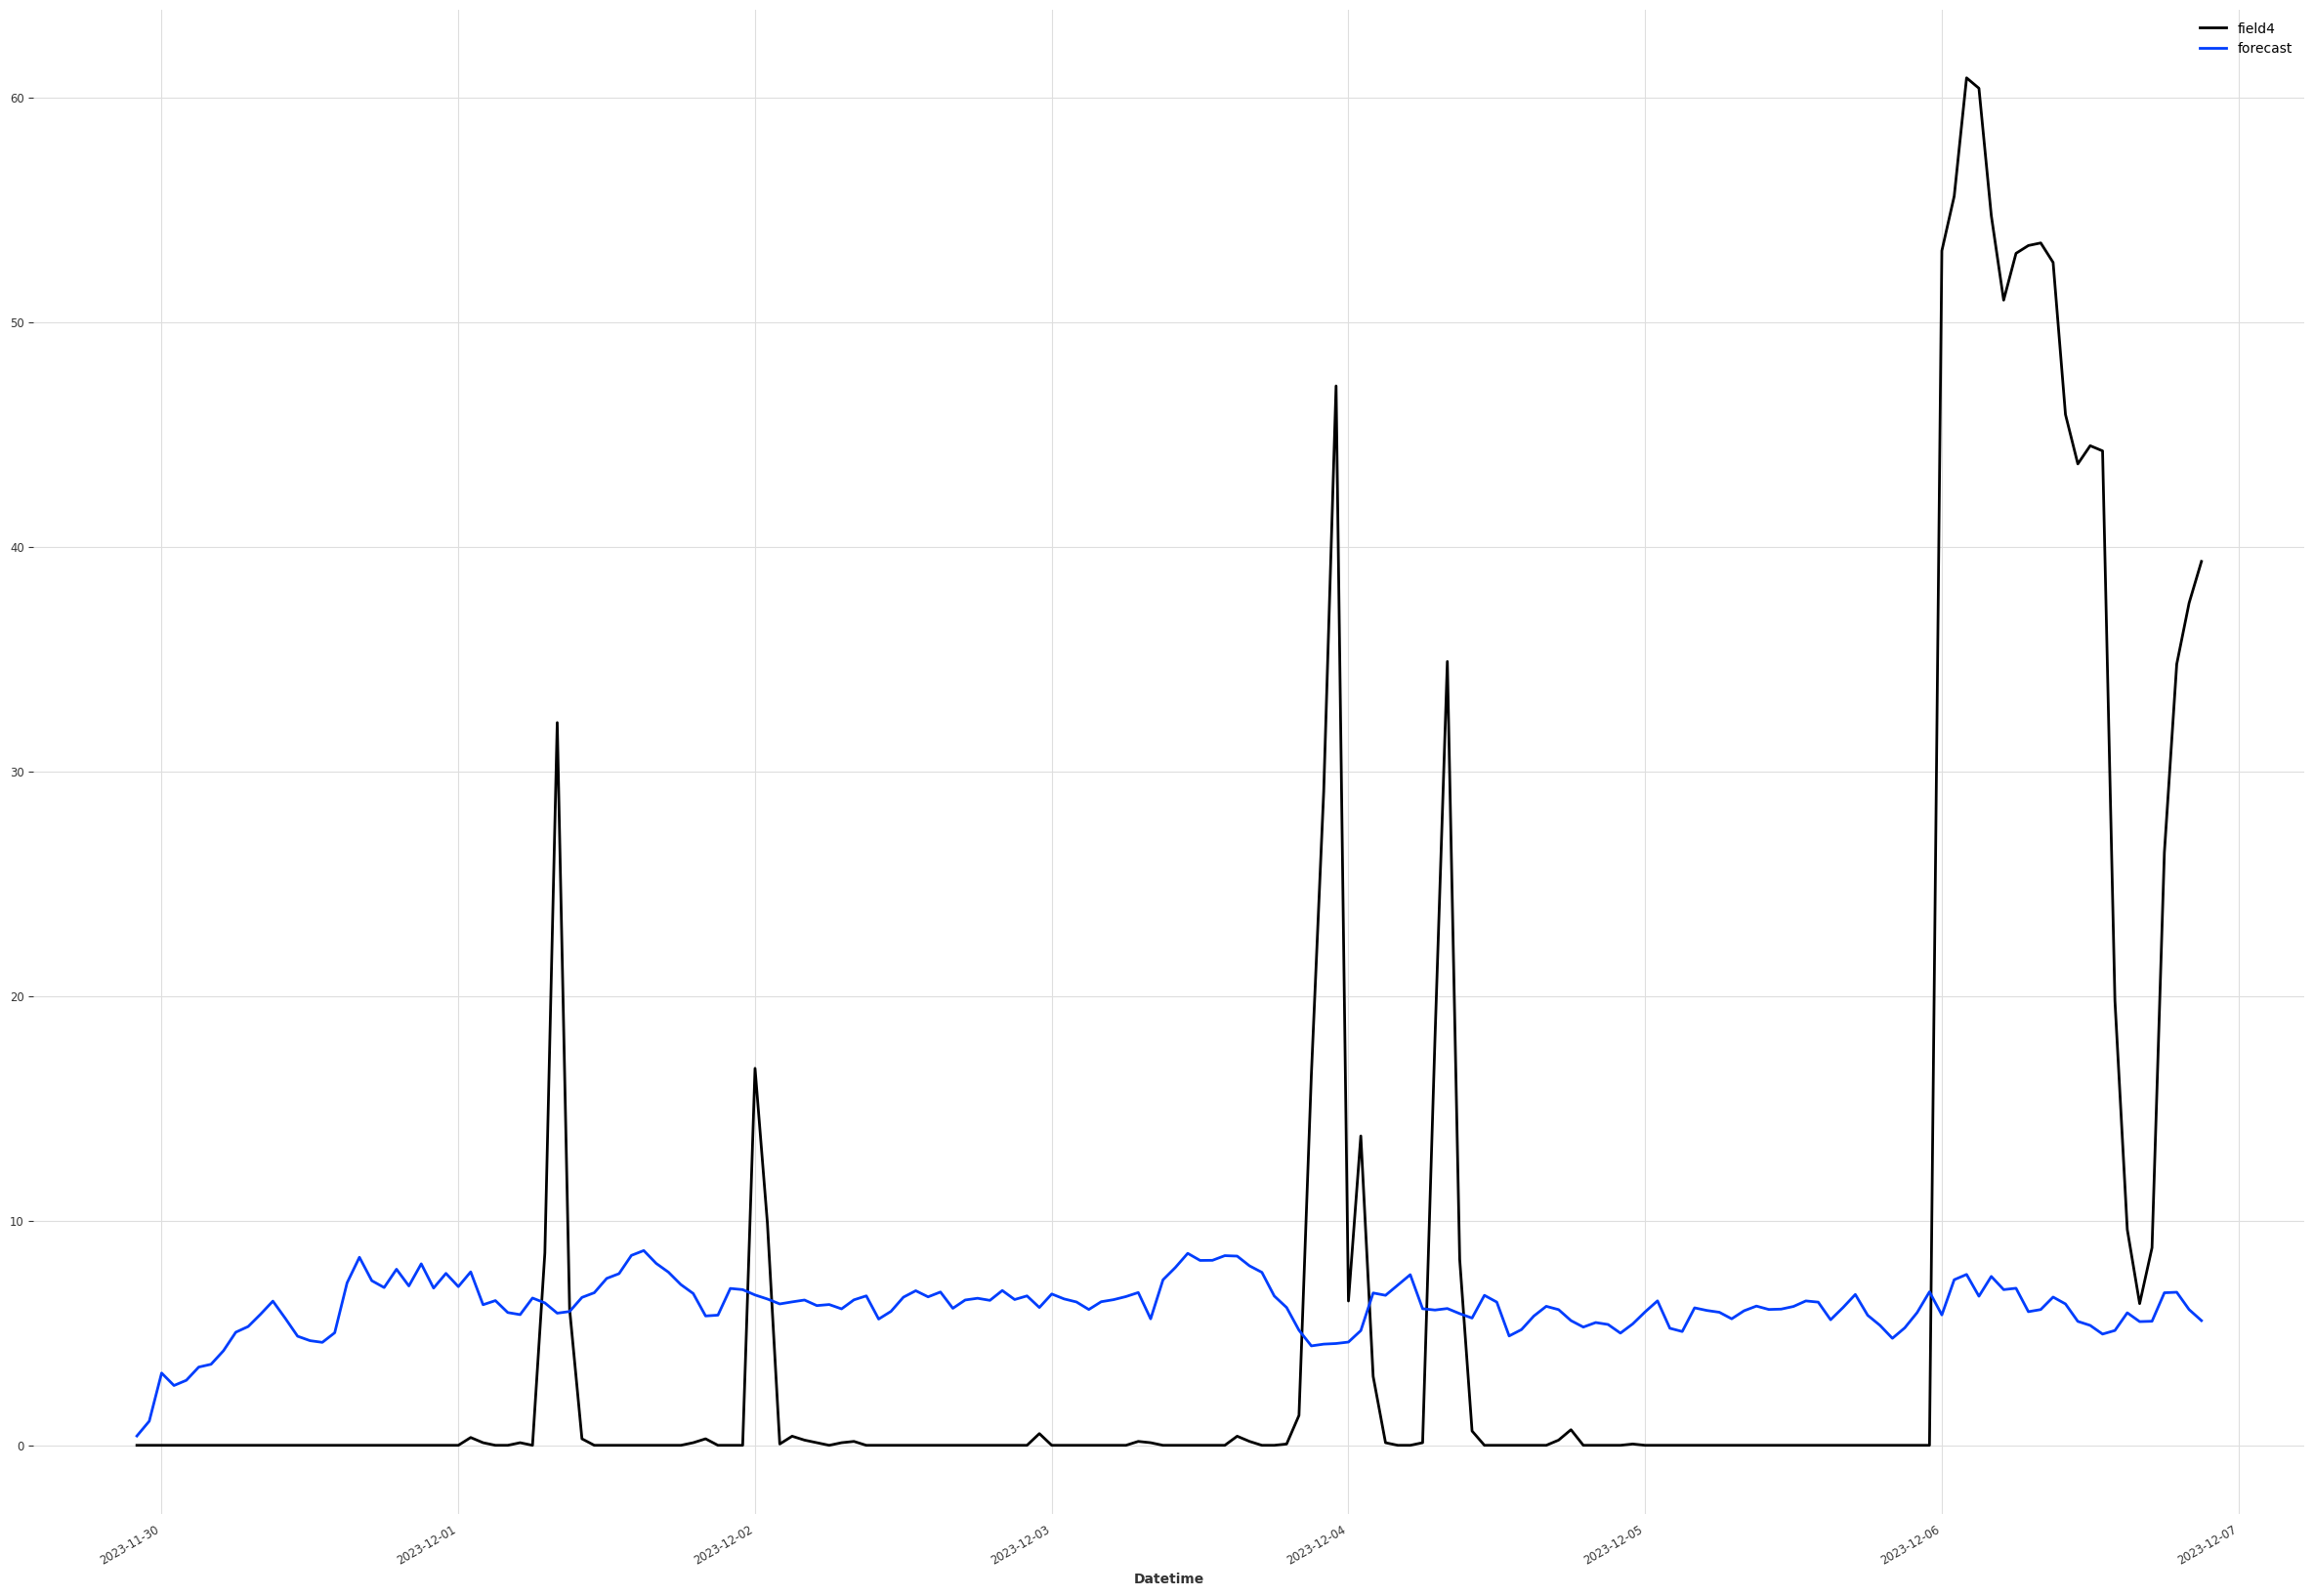

In [12]:
# mean_absolute_error(val1,predcbm1)

plt.rcParams['figure.figsize'] = [30, 20]
val4.plot()
prediction4.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

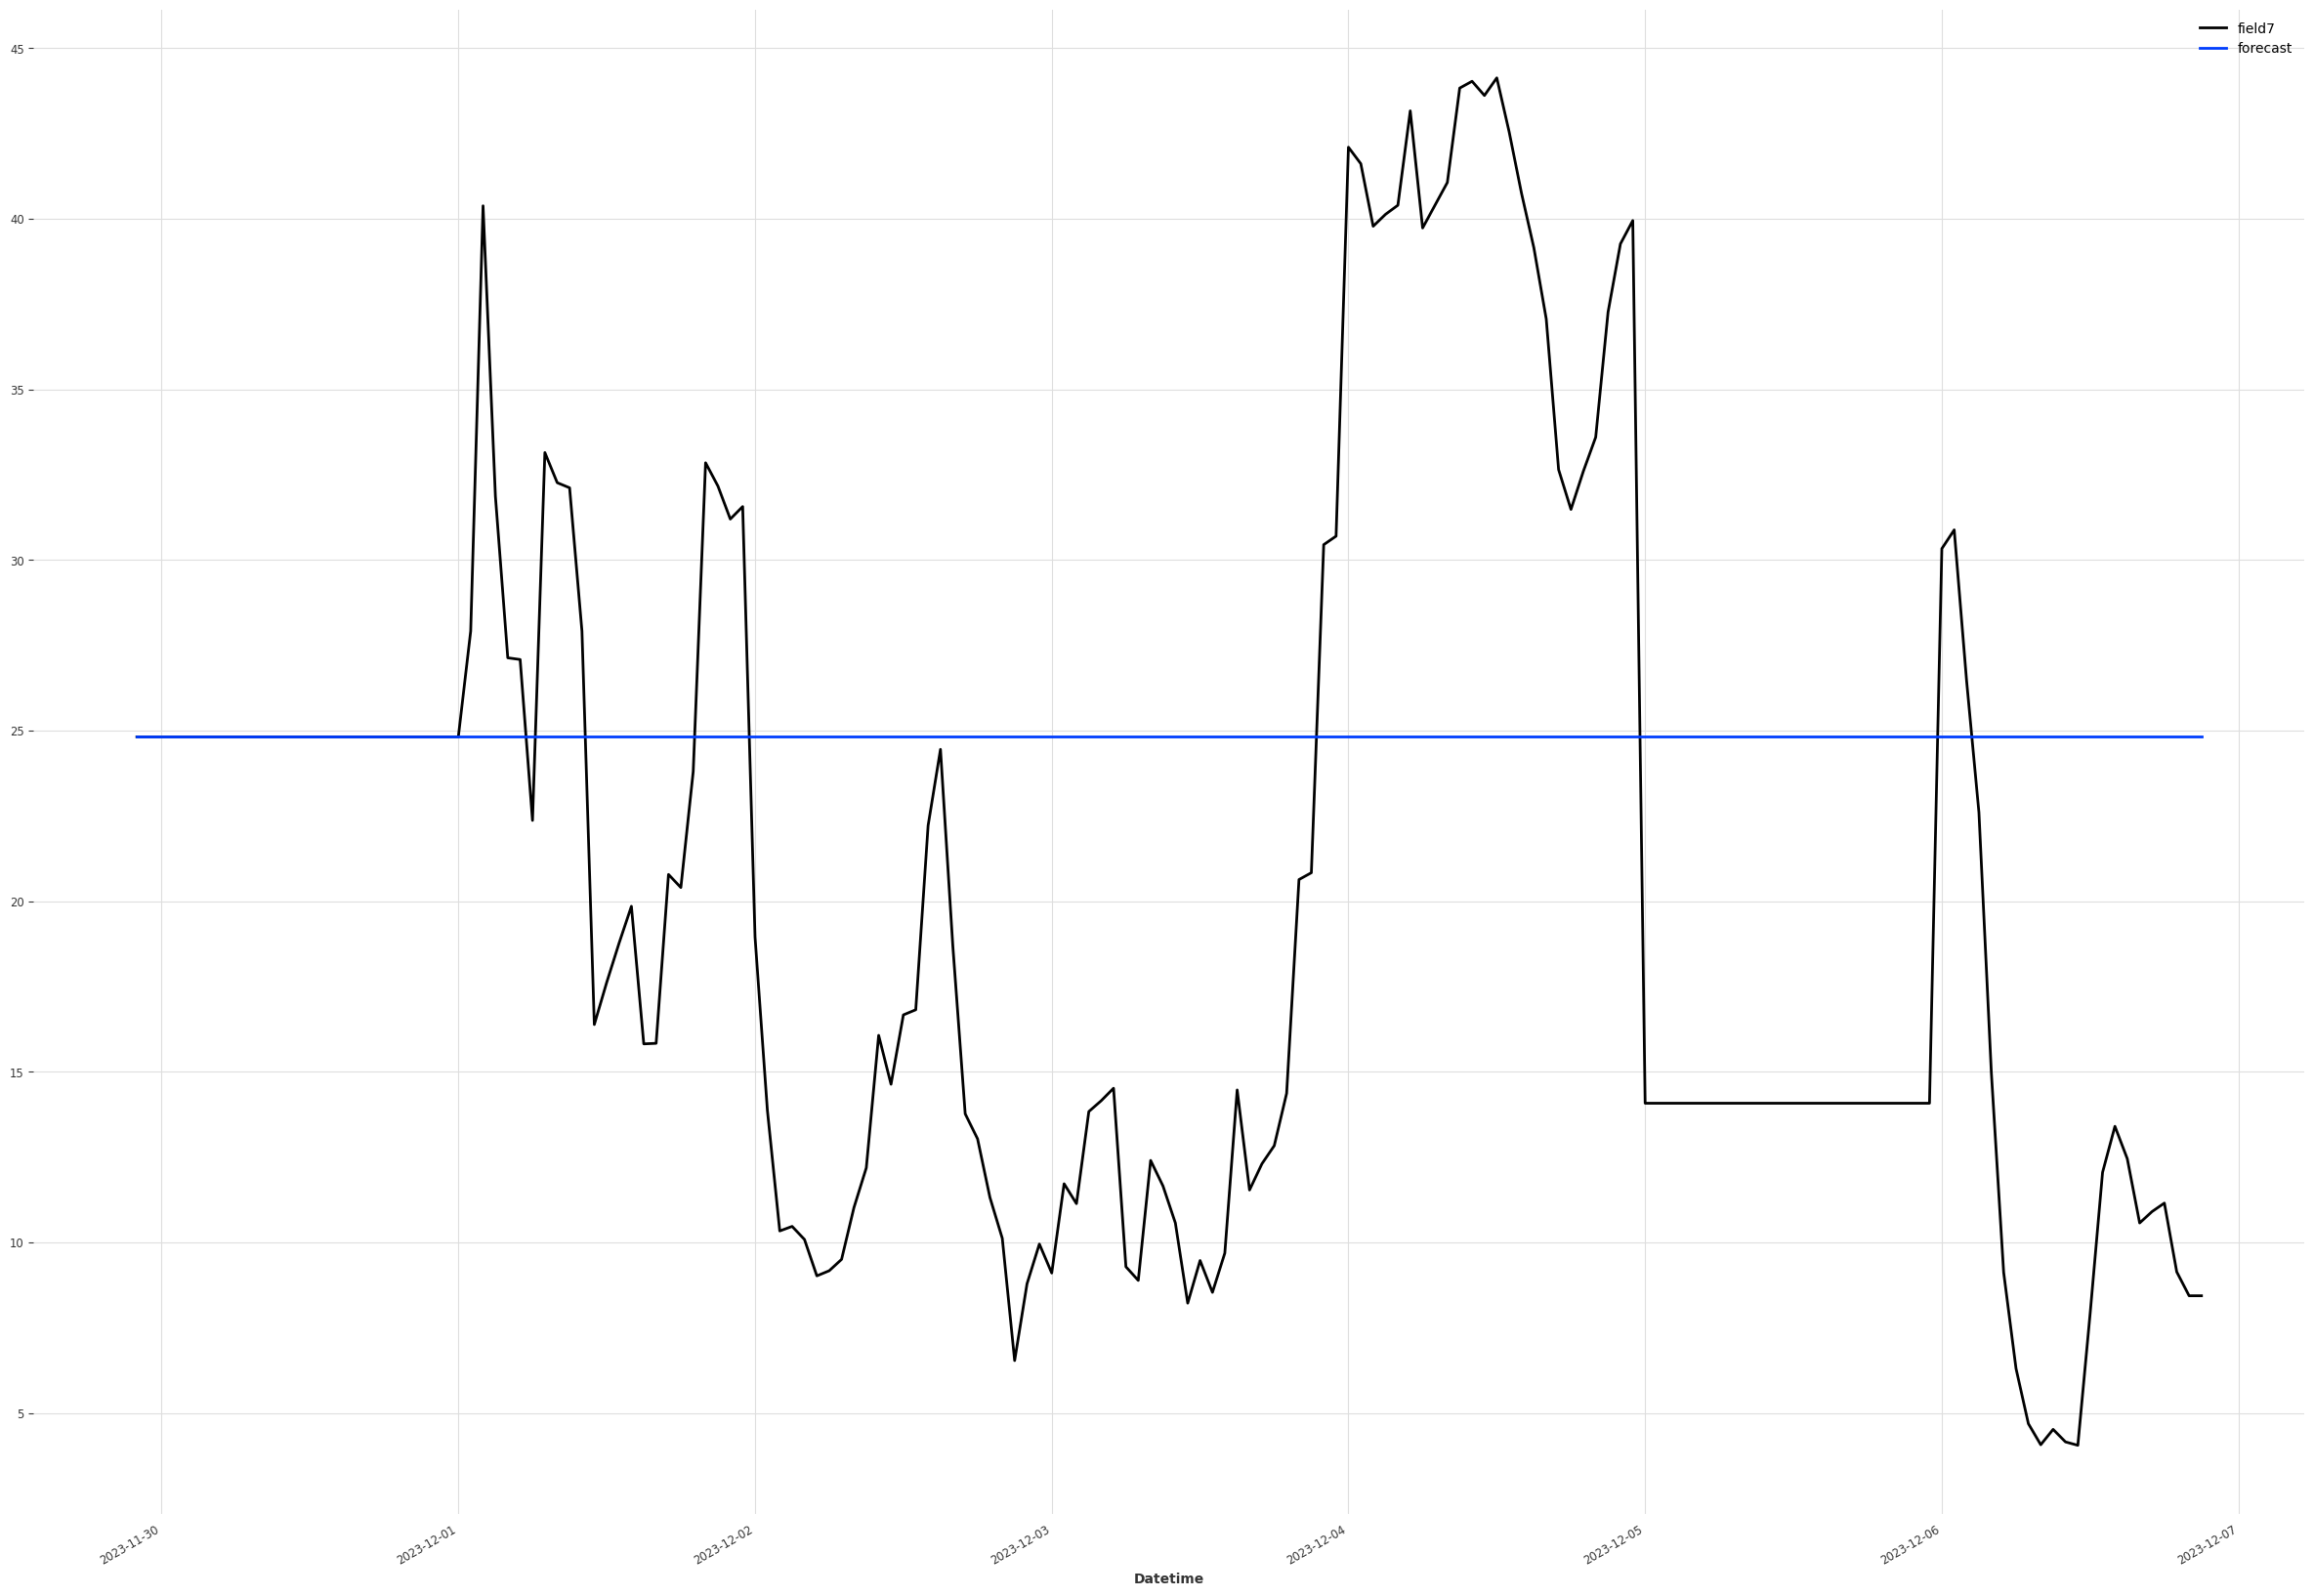

In [13]:
# mean_absolute_error(val1,predcbm1)

plt.rcParams['figure.figsize'] = [30, 20]
val7.plot()
prediction7.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

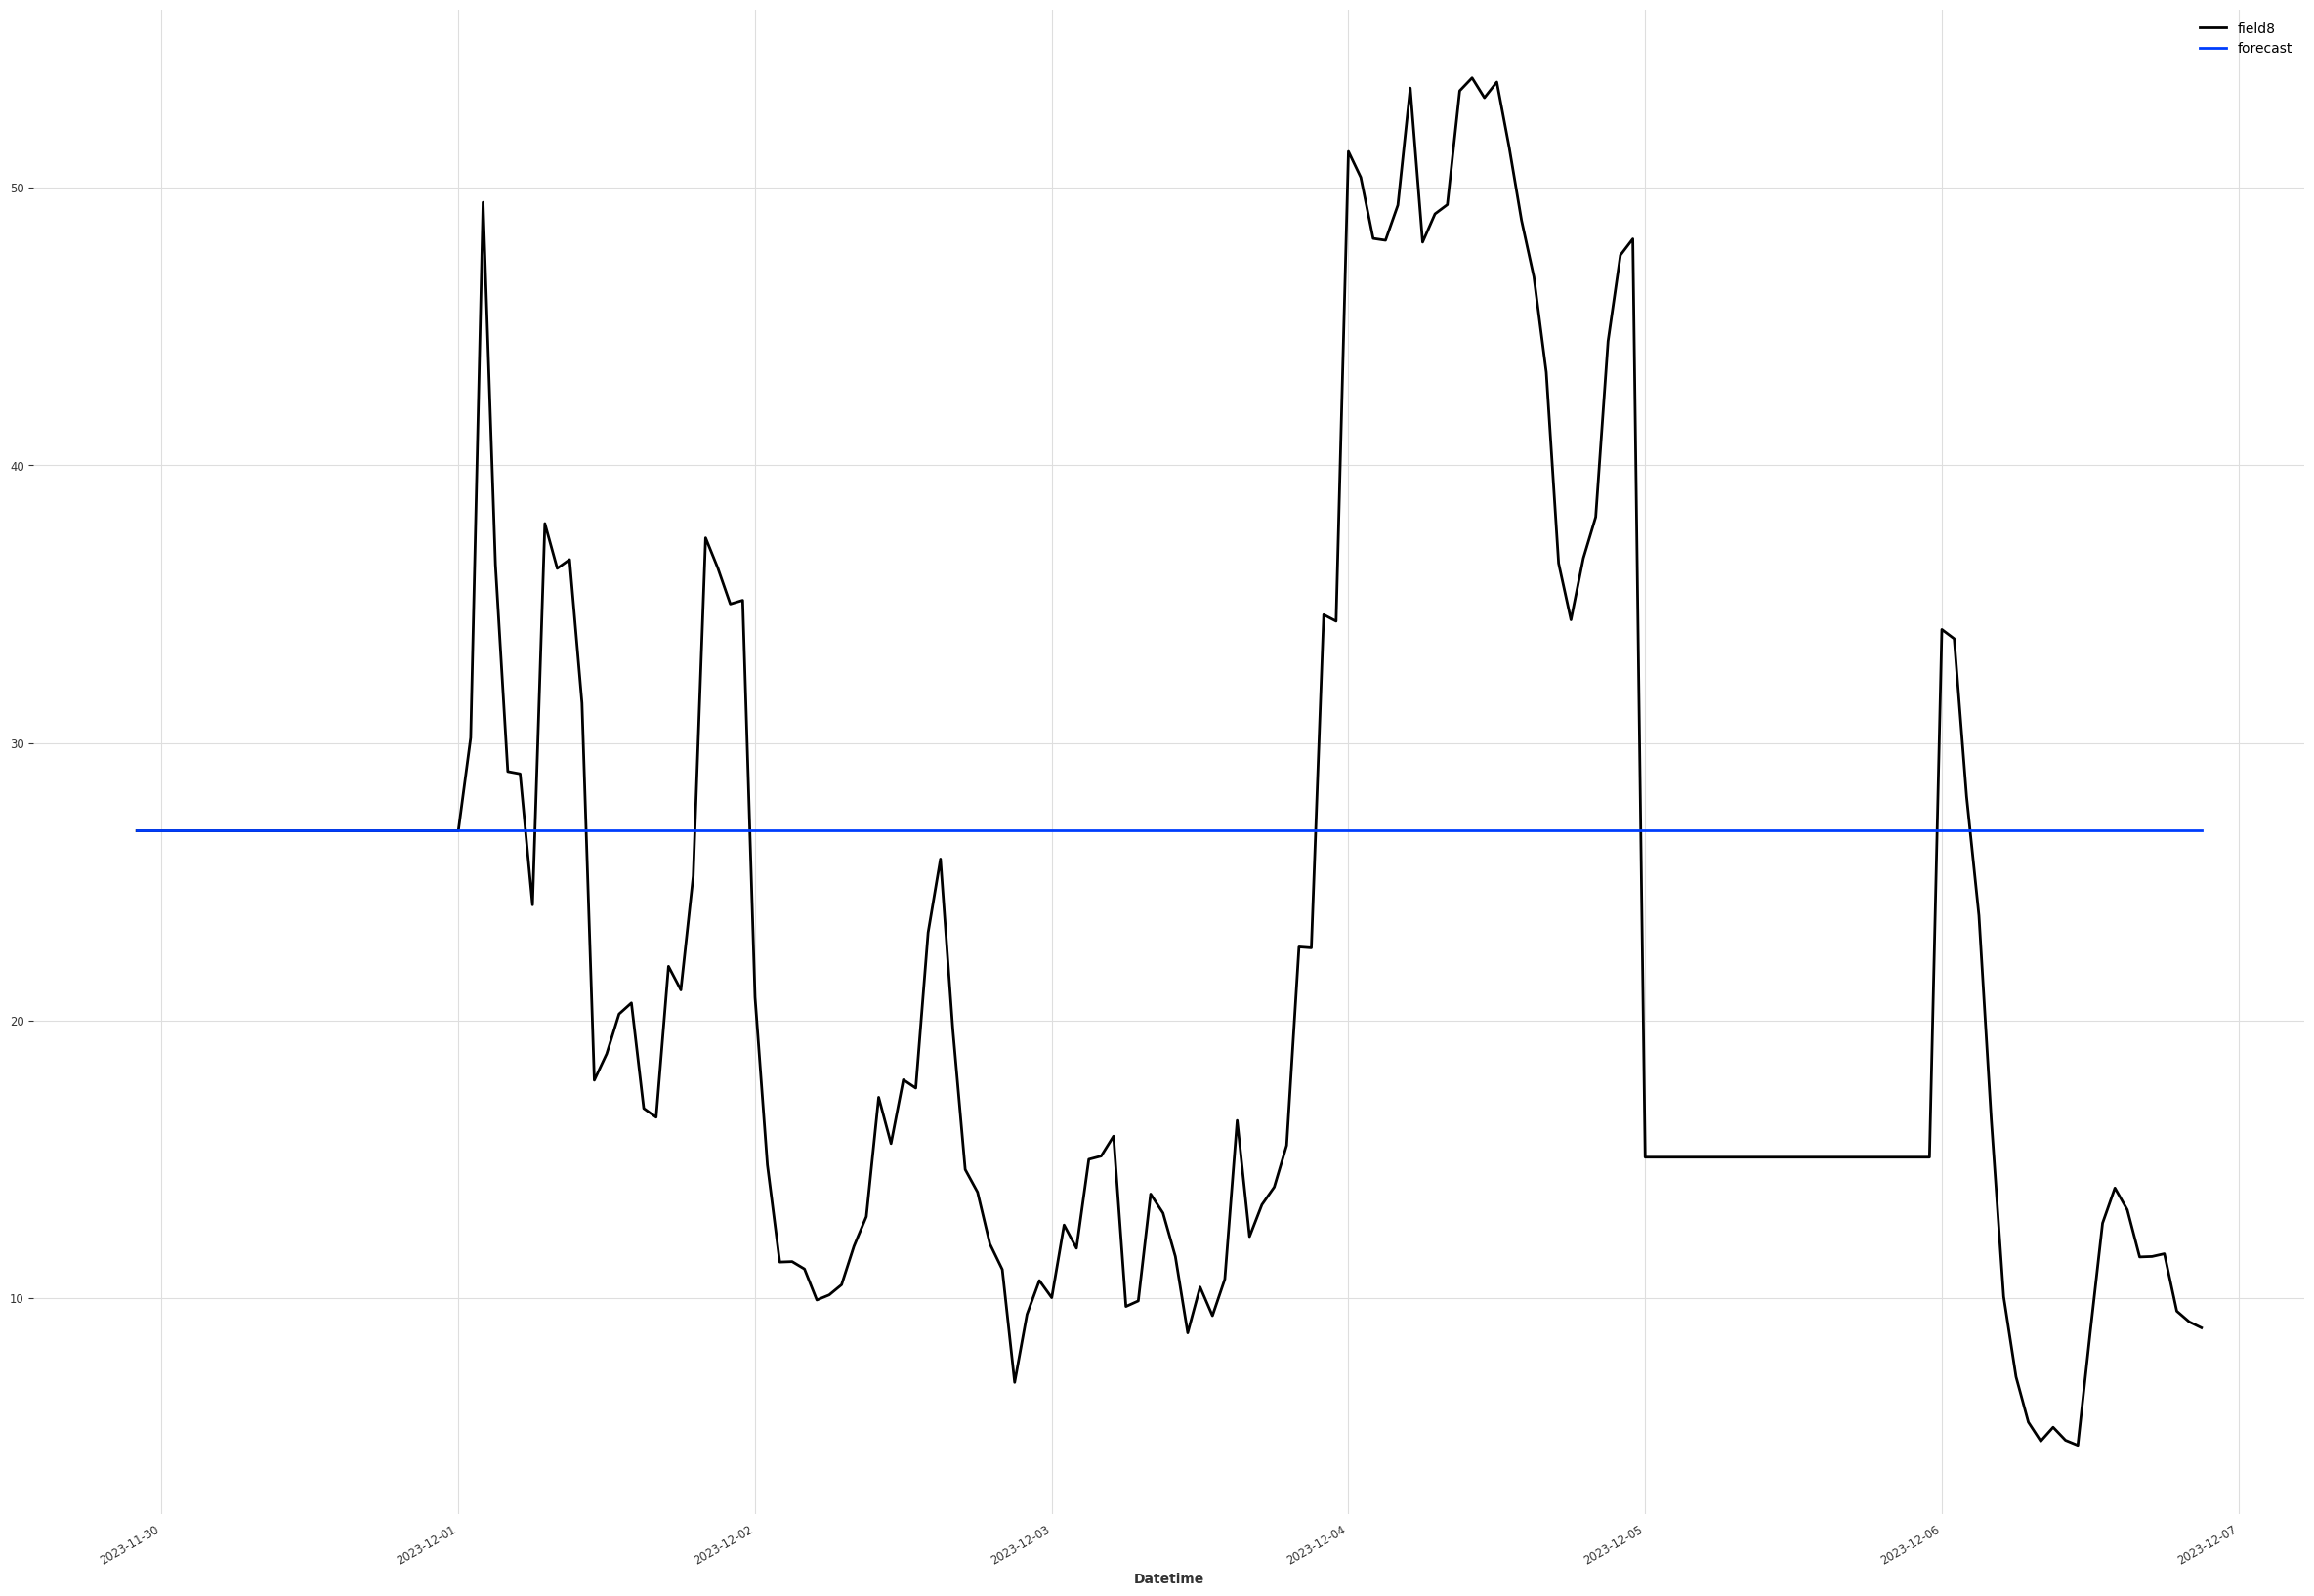

In [14]:
# mean_absolute_error(val1,predcbm1)

plt.rcParams['figure.figsize'] = [30, 20]
val8.plot()
prediction8.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()